In [1]:
import pandas as pd
bank_data = pd.read_csv('data_test/churn.csv', sep=',')
bank_df = bank_data.copy()
"""Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)"""
bank_df = bank_df.drop (['RowNumber'], axis=1)
display (bank_df.head())
"""Є проблема з віком - що це за категорія? (коли пішов? вік на теперешній час?)
Який час ми розглядаємо в зазначеному зрізі (річний?)"""

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


'Є проблема з віком - що це за категорія? (коли пішов? вік на теперешній час?)\nЯкий час ми розглядаємо в зазначеному зрізі (річний?)'

([<matplotlib.patches.Wedge at 0x13819065360>,
 [Text(-0.6568642010431011, -0.8823431426537006, '0 - loyal clients'),
  Text(0.6568642010431012, 0.8823431426537006, '1-clients that left')],
 [Text(-0.3582895642053278, -0.4812780778111093, '79.63%'),
  Text(0.35828956420532787, 0.4812780778111093, '20.37%')])

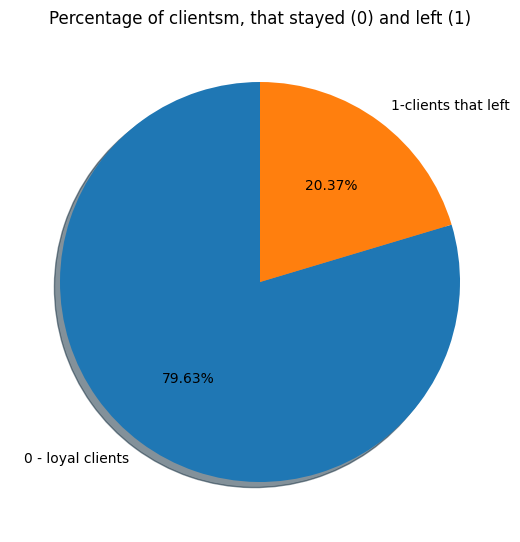

In [14]:
import matplotlib.pyplot as plt
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
exited_ratio = bank_df['Exited'].value_counts()
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title("Percentage of clientsm, that stayed (0) and left (1)")
axes.pie(
    labels=['0 - loyal clients','1-clients that left'],
    autopct='%1.2f%%', #'%.1f%%'
    x=exited_ratio,
    shadow=True,
    startangle=90
)
#Клієнти, які пішли складають 1/5 частину

Age  Geography
18   France       7
     Germany      6
     Spain        1
19   France       5
     Germany      8
                 ..
81   Germany      1
83   Germany      1
84   France       1
     Germany      1
92   France       2
Name: Balance, Length: 189, dtype: int64


'Зробив розподіл по країнам та віку, але з різниці бачу тільки, що медіана дорівнює середньому зн.,\nа сума подібна до кіль-ті. Найбільша кількість та суми вкладників припадають на вік від 20-ти до 50 років\nВ Іспанії суми менші загалом ніж у 2-х інших країнах'

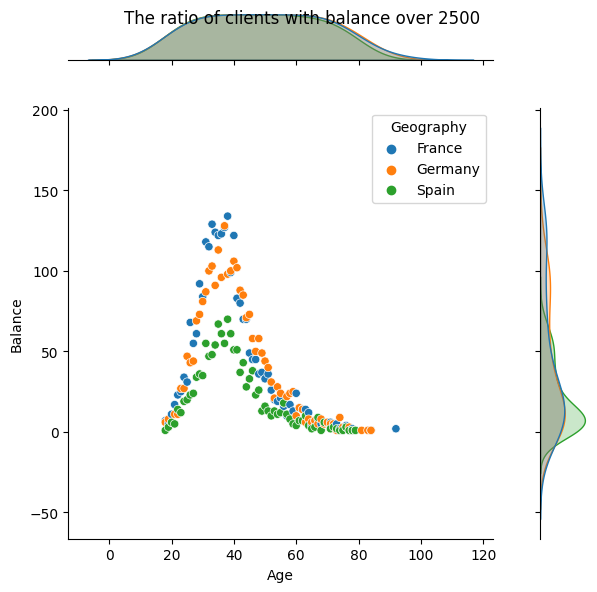

In [48]:
import plotly.express as px
import plotly
import seaborn as sns
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
#Опишите распределение и сделайте выводы.
balance_over_2500 = bank_df[bank_df['Balance'] > 2500]#.sort_values(by=['Geography'])
line_bal = balance_over_2500.groupby(['Age','Geography'])['Balance'].count() 
#не зрозуміло як вкрапляти колонку зі странами? та що за лінії за координатами?
print (line_bal)
"""fig = px.line( #3 separeted lines
    data_frame=line_bal,
    x=line_bal.index[0],
    y=line_bal,
    color ='Geography',
    height=500,
    width=800,
    title='the ratio of the sum and mean balance according to the age in different countries'
)
fig.show()
"""
"""plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])"""
joinplot = sns.jointplot (
    data=line_bal,
    kind='scatter',
    space=1,
    x='Age',
    y=line_bal,
    hue='Geography',
    dropna=True,
    color='#fdbb84',#не зрозуміло, як оперувати кольорами, https://www.codecademy.com/article/seaborn-design-ii
    #https://colorbrewer2.org/#type=sequential&scheme=OrRd&n=3
    height=6,
#    xlim=(0,100), що це за параметри?
#    ylim=(10,100) що за випуклість праворуч від Х
)
joinplot.fig.suptitle("The ratio of clients with balance over 2500")
"""Зробив розподіл по країнам та віку, але з різниці бачу тільки, що медіана дорівнює середньому зн.,
а сума подібна до кіль-ті. Найбільша кількість та суми вкладників припадають на вік від 20-ти до 50 років
В Іспанії суми менші загалом ніж у 2-х інших країнах"""

Geography  Age
France     18          0.00
           21     210433.08
           22     598525.34
           23          0.00
           24          0.00
                    ...    
Spain      66          0.00
           67     125919.35
           68          0.00
           69     137453.43
           71     206868.92
Name: Balance, Length: 158, dtype: float64
Geography  Age
France     18      907078.66
           19      607928.99
           20     1326811.02
           21     1991885.98
           22     2315631.43
                     ...    
Spain      77      149083.70
           78      151675.65
           79      108078.56
           80           0.00
           88           0.00
Name: Balance, Length: 195, dtype: float64


Text(0.5, 0.98, "The ratio of clients' balance who have stayed")

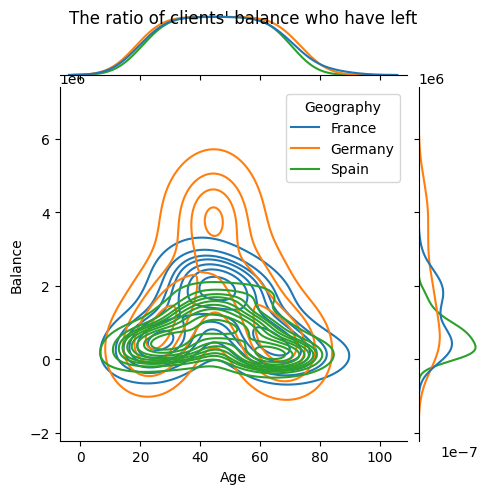

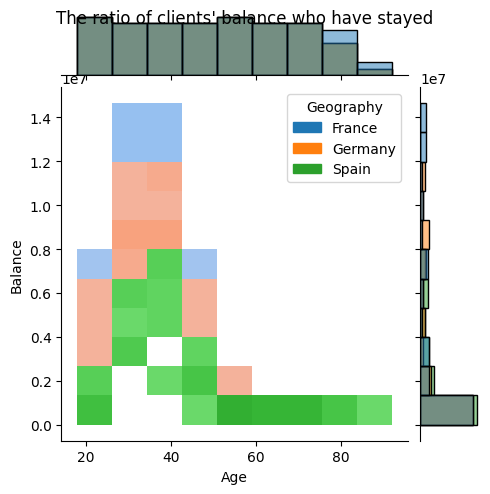

In [57]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на
#накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может
#не устраивать ушедших клиентов в банке.
exited_sum = bank_df[bank_df['Exited'] == 1].groupby(['Geography','Age'])['Balance'].sum()
not_exited_sum = bank_df[bank_df['Exited'] == 0].groupby(['Geography','Age'])['Balance'].sum()
#шкода, що не знаємо, коли клієнт пішов
import matplotlib.pyplot as plt
import seaborn as sns

print (exited_sum)
print (not_exited_sum)

"""fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('The graphics of exited and stayed clients according to their balance')
sns.jointplot(ax=axes[0],
              data=exited_sum,
    kind='kde',
    x='Age',
    y=exited_sum,
    hue='Geography',
    height=5,)

sns.jointplot(ax=axes[1],
              data=not_exited_sum,
    kind='hist',
    x='Age',
    y=not_exited_sum,
    hue='Geography',
    height=5)  --------------------> Багато часу витратив на пошук монтування розсіяної діаграми до підграфіків,
    але не осилив?"""
    
j1 = sns.jointplot (
    data=exited_sum,
    kind='kde',
    x='Age',
    y=exited_sum,
    hue='Geography',
    height=5,
)
j1.fig.suptitle("The ratio of clients' balance who have left")
#отображаем график
j2 = sns.jointplot (
    data=not_exited_sum,
    kind='hist',
    x='Age',
    y=not_exited_sum,
    hue='Geography',
    height=5
)
j2.fig.suptitle("The ratio of clients' balance who have stayed")
#Ті хто ппокинув банк, мали на рахунках більші суми балансу, особливо слід звернути увагу на Німеччину

CustomerId  Surname  CreditScore  Geography  Gender  Tenure  \
Exited Age                                                                
0      18           20       20           20         20      20      20   
       19           26       26           26         26      26      26   
       20           38       38           38         38      38      38   
       21           50       50           50         50      50      50   
       22           72       72           72         72      72      72   
...                ...      ...          ...        ...     ...     ...   
1      71            7        7            7          7       7       7   
       72            1        1            1          1       1       1   
       73            1        1            1          1       1       1   
       74            1        1            1          1       1       1   
       84            1        1            1          1       1       1   

            Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
Exited Age                                                                      
0      18        20             20         20              20               20  
       19        26             26         26              26               26  
       20        38             38         38              38               38  
       21        50             50         50              50               50  
       22        72             72         72              72               72  
...             ...            ...        ...             ...              ...  
1      71         7              7          7               7                7  
       72         1              1          1               1                1  
       73         1              1          1               1                1  
       74         1              1          1               1                1  
       84         1              1          1               1                1  

[128 rows x 11 columns]

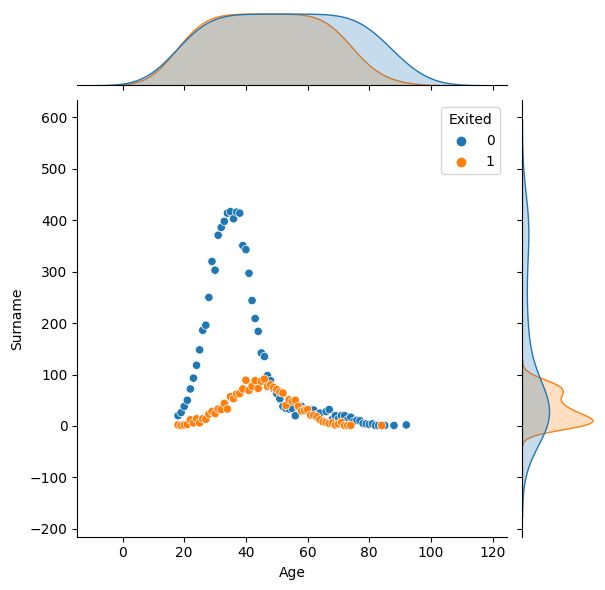

In [25]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?
#На какую возрастную категорию клиентов стоит обратить внимание банку?
data_sep = bank_df.groupby(['Exited','Age']).count()
import plotly.express as px
import plotly
import seaborn as sns
display (data_sep)
joinplot = sns.jointplot (
    data=data_sep,
    x='Age',
    y='Surname',
    hue='Exited',
    height=6,
)
#Варто звернути увагу на клієнтів віком від 30 до 50 років, з піком у 40

      Exited  CreditScore  EstimatedSalary
0          0          405         72950.14
1          0          408        124874.23
2          0          410        109733.73
3          0          410         89822.48
4          0          411        120694.35
...      ...          ...              ...
9995       1          850         12457.76
9996       1          850          6865.41
9997       1          850          5669.31
9998       1          850          4861.72
9999       1          850           944.41

[10000 rows x 3 columns]
Exited  CreditScore
0       405             72950.140
        408            124874.230
        410             99778.105
        411             85223.635
        412             12510.530
                          ...    
1       845             31726.760
        846             35917.055
        847             80104.615
        849            170130.080
        850             70916.000
Name: EstimatedSalary, Length: 862, dtype: float64


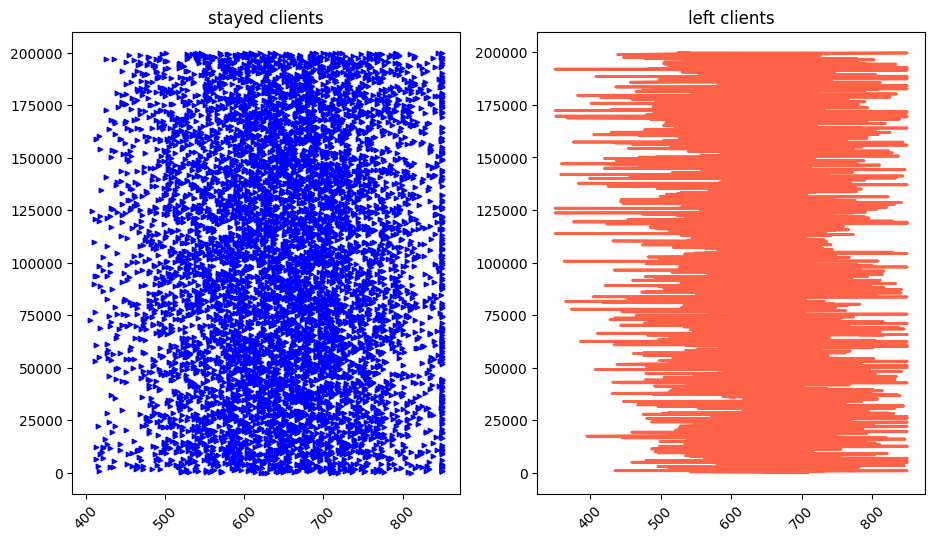

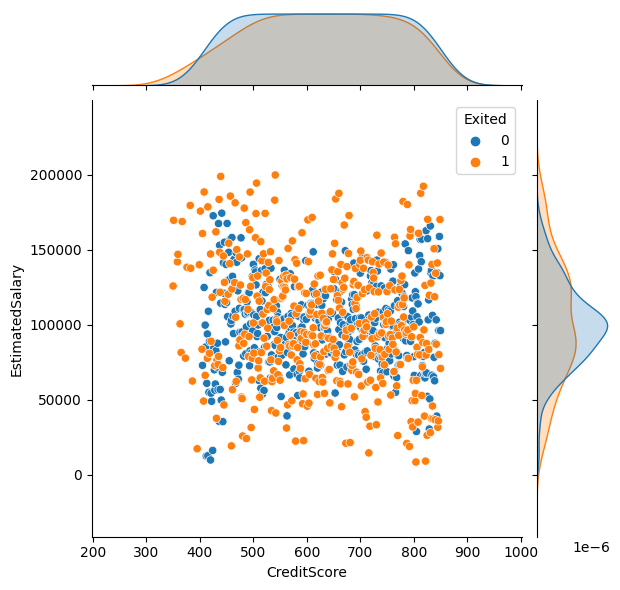

In [17]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
#Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной
#взаимосвязи, укажите это.
import seaborn as sns
ExCrSal = bank_df.sort_values(
    by=['Exited','CreditScore','EstimatedSalary'],
    ascending=[True,True,False],
    ignore_index=True).loc[:,['Exited','CreditScore','EstimatedSalary']]
print (ExCrSal)
ExCrSal_0 = bank_df[bank_df['Exited'] == 0].sort_values(
    by=['EstimatedSalary','CreditScore'],
    ascending=[True,False],
    ignore_index=True)
ExCrSal_1 = bank_df[bank_df['Exited'] == 1].sort_values(
    by=['EstimatedSalary','CreditScore'],
    ascending=[True,False],
    ignore_index=True)

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,6))

axes[0].scatter(
    x=ExCrSal_0["CreditScore"], 
    y=ExCrSal_0["EstimatedSalary"], 
    s=10,
    marker='>',
    c = 'blue'
)
axes[0].xaxis.set_tick_params(rotation=45)
axes[0].set_title("stayed clients")

axes[1].plot(
    ExCrSal_1["CreditScore"],
    ExCrSal_1["EstimatedSalary"],
    color="tomato",
    lw=2,
)
axes[1].set_title('left clients')
axes[1].xaxis.set_tick_params(rotation=45)

data_credit = bank_df.groupby(['Exited','CreditScore'])['EstimatedSalary'].median()#[['CreditScore','EstimatedSalary']]
print (data_credit)
joinplot = sns.jointplot (
    data=data_credit,
    x='CreditScore',
    y=data_credit,
    hue='Exited',
    height=6,
)
#Явної закономірності не бачу.


33.46
19.7
[33.46, 19.7]


C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_7260\700362728.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exited_female = bank_df[bank_df['Gender'] == 'Female'][bank_df['Exited'] == 1].count()
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_7260\700362728.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stayed_female = bank_df[bank_df['Gender'] == 'Female'][bank_df['Exited'] == 0].count()
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_7260\700362728.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exited_male = bank_df[bank_df['Gender'] == 'Male'][bank_df['Exited'] == 1].count()
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_7260\700362728.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stayed_male = bank_df[bank_df['Gender'] == 'Male'][bank_df['Exited'] == 0].count()


Text(0.5, 0, 'The ratio of left people')

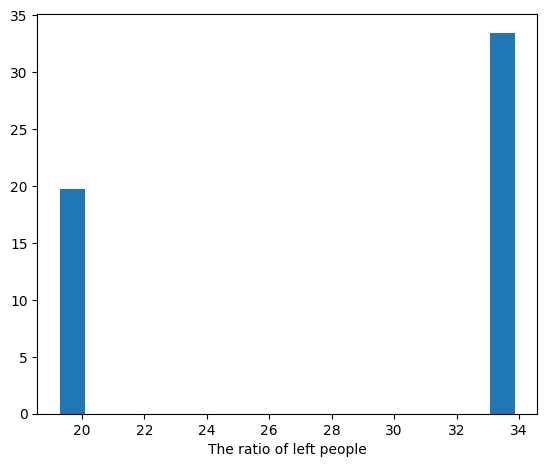

In [15]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
"""Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это
ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов)."""

exited_female = bank_df[bank_df['Gender'] == 'Female'][bank_df['Exited'] == 1].count()
stayed_female = bank_df[bank_df['Gender'] == 'Female'][bank_df['Exited'] == 0].count()
perc_exit_fem = round (exited_female[0] / stayed_female[0] * 100,2)
print (perc_exit_fem)
exited_male = bank_df[bank_df['Gender'] == 'Male'][bank_df['Exited'] == 1].count()
stayed_male = bank_df[bank_df['Gender'] == 'Male'][bank_df['Exited'] == 0].count()
perc_exit_male = round (exited_male[0] / stayed_male[0] * 100,2)
print (perc_exit_male)
list_ex = [perc_exit_fem,perc_exit_male]
print(list_ex)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,0.5,1])
axes.bar(x = list_ex, height = list_ex) # set_color('r')) #color = exited_gender.index);
axes.set_xlabel('The ratio of left people')
#axes.set_title('Left clients according to the gender')
#Частіше йдуть з банку жінки.//add bar with left-clients

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64


Text(0.5, 0, 'the number of products')

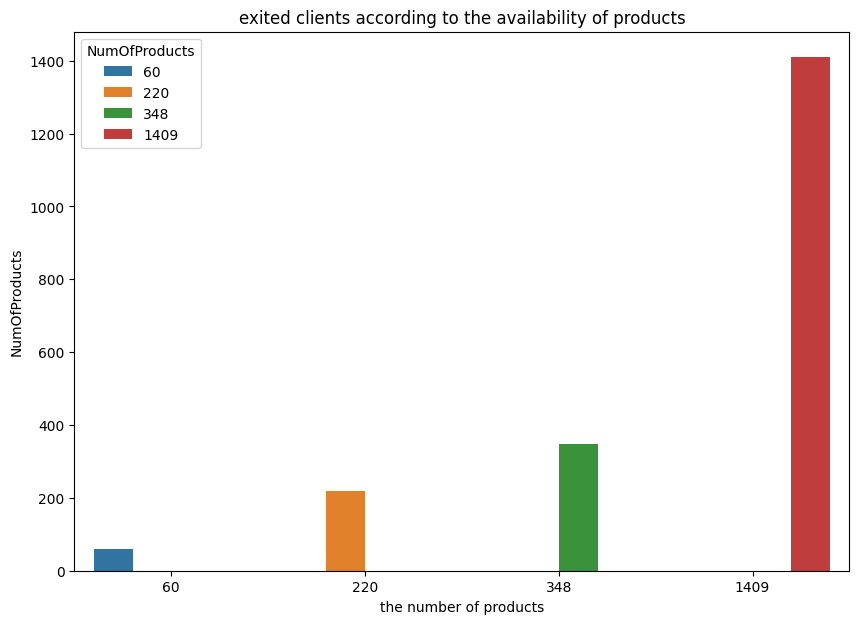

In [36]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте
#многоуровневую столбчатую диаграмму.
exited_products = bank_df[bank_df['Exited'] == 1]['NumOfProducts'].value_counts()
print (exited_products)
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=exited_products,
    x=exited_products.index,
    y=exited_products,
    hue=exited_products.index,
)
barplot.set_title('exited clients according to the availability of products');
plt.xlabel('the number of products')# How to set numbers of products in x?

0    1302
1     735
Name: IsActiveMember, dtype: int64


Text(0.5, 1.0, 'How active were clients before leaving')

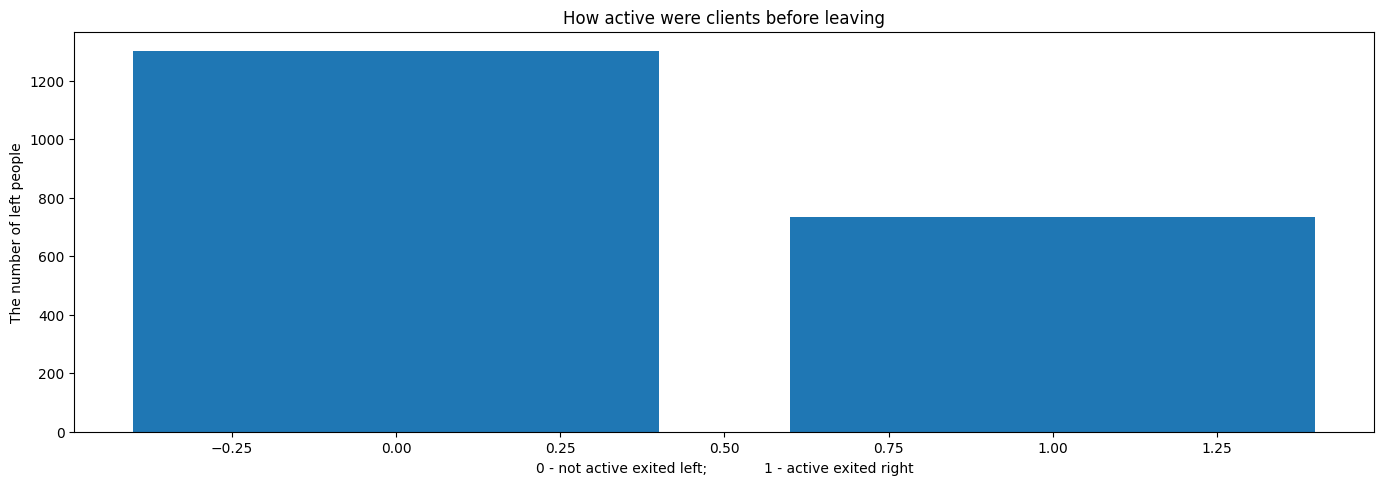

In [22]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это.
#Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных? 1- active
exited_active = bank_df[bank_df['Exited'] == 1]['IsActiveMember'].value_counts()
print (exited_active)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
fig = plt.figure(figsize=(13,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(x = exited_active.index, height = exited_active) # set_color('r')) #color = exited_gender.index);
axes.set_ylabel('The number of left people')
axes.set_xlabel('0 - not active exited left;             1 - active exited right')
axes.set_title('How active were clients before leaving')
#неактивні йдуть в 2 рази частіше, але порадити нічого не можу, бо не розумію, що таке статус активного клієнта

In [34]:
#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это
#соотношение на карте мира. Предположите, с чем это может быть связано.
exited_Germany = round (bank_df[bank_df['Geography'] == 'Germany'][bank_df['Exited'] == 1].count() /
                  bank_df[bank_df['Geography'] == 'Germany'][bank_df['Exited'] == 0].count() * 100,2)[0]
print (exited_Germany)
exited_Spain = round (bank_df[bank_df['Geography'] == 'Spain'][bank_df['Exited'] == 1].count() /
                  bank_df[bank_df['Geography'] == 'Spain'][bank_df['Exited'] == 0].count() * 100,2)[0]
print (exited_Spain)
exited_France = round (bank_df[bank_df['Geography'] == 'France'][bank_df['Exited'] == 1].count() /
                  bank_df[bank_df['Geography'] == 'France'][bank_df['Exited'] == 0].count() * 100,2)[0]
print (exited_France)

import plotly
import plotly.express as px

choropleth_data = exited_Germany

#В Німеччені більша доля. Взагалі не розумію, як можно засунути цю інфу в короплет?/

C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_15336\2866578003.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exited_Germany = round (bank_df[bank_df['Geography'] == 'Germany'][bank_df['Exited'] == 1].count() /
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_15336\2866578003.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bank_df[bank_df['Geography'] == 'Germany'][bank_df['Exited'] == 0].count() * 100,2)[0]
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_15336\2866578003.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exited_Spain = round (bank_df[bank_df['Geography'] == 'Spain'][bank_df['Exited'] == 1].count() /
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_15336\2866578003.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bank_df[bank_df['Geography'] == 'Spain'][bank_df['Exited'] == 0].count() * 100,2)[0]
C:\Users\управ.ПК\AppData\Local\Temp\i

48.02
20.01
19.27


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


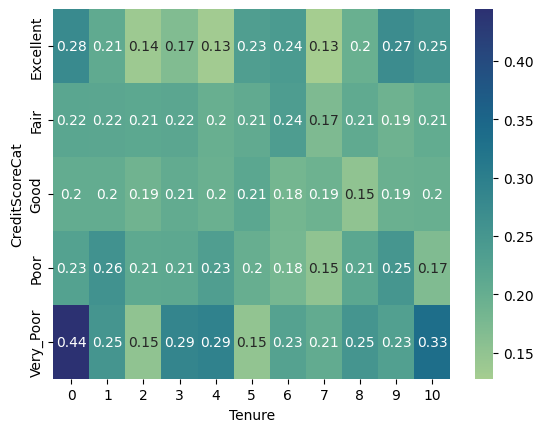

In [47]:
#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией
#get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак
#CreditScoreCat — категории кредитного рейтинга.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
"""Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а
столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной
таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории
клиентов, которые уходят чаще всего."""
bank_df['CreditScoreCat'] = bank_df['CreditScore'].apply(get_credit_score_cat)
pivot_credit = bank_df.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean',#'count'],
    fill_value=0
)
display (pivot_credit)#.sort_values(axes(0)))#(by=columns))

import seaborn as sns
heatmap = sns.heatmap(data=pivot_credit, cmap='crest', annot=True)
#Більше всього йдуть клієнти з низьким кредитним рівнем, потім з бездоганим; менше всього кидають банк
#люди з добрим рівнем